### Bias vs Variance

In the slides on polynomial regression we encountered the central dilemma in machine learning: the bias/variance tradeoff.

Here we make that idea formal and explore it on some synthetic and real datasets.

This discussion corresponds to pages 62-65 of Learning From Data.

---

First we fix $P(\bar{x},y)$ which is the joint distribution on examples we might see.  

In our "frogs in the woods" metaphor this determines which frogs you are likely to see in the woods, and which species they are likely to be.

The central character in the story is $\bar{g}$.  

This guy is the "average best hypothesis".  The average is over all the possible training sets $\mathcal{D}$ that you might happen to get. 

$$\bar{g}(\bar{x}) = \mathbb{E}_\mathcal{D}[g^\mathcal{D}(\bar{x})]$$

where $\mathcal{D}$ ranges over all training sets and $g^\mathcal{D}$ is the final hypothesis for training set $\mathcal{D}$.

In terms of the metaphor, this is the average hypothesis you might produce after seeing the frogs that you see in your woods walk.

---

Now **bias** is how far $\bar{g}$ is from the target function $f$.  

${\bf bias}(\bar{x}) = (\bar{g}(\bar{x})-f(\bar{x}))^2$

If the hypothesis space $\mathcal{H}$ is complex then this will be low. 

In an extreme case we might have $f \in \mathcal{H}$ in which case bias would be zero.

---

Now we will discuss variance. 

We know that $\bar{g}$ is the average best hypothesis where the average is over all datasets $\mathcal{D}$.  

But for any particular $\mathcal{D}$, we might get a best hypothesis $g^\mathcal{D}$ which is not very close to the average.  This is **variance**.

${\bf variance}(\bar{x}) = (g^\mathcal{D}(\bar{x}) - \bar{g}(\bar{x}))^2$.

---

We saw this in polynomial regression where the high degree fit of a small dataset varied wildly depending on which points we happened to draw for our $\mathcal{D}$.

Learning algorithms with a complex $\mathcal{H}$ tend to have high variance.  

Intuitively this is because there are lots of hypotheses and for any given dataset one of them will through "pure luck" happen to be perfectly suited to it.

But because it is so tailored to the particular $\mathcal{D}$ it may not be very much like the "typical" best hypothesis $\bar{g}$.

---

Now we define

${\bf bias + variance} = \mathbb{E}_\bar{x}[{\bf bias}(\bar{x}) + {\bf variance}(\bar{x})]$.

One can prove that the expected out of sample MSE error is bias+variance.

$\mathbb{E}_\mathcal{D}[E_{out}(g^\mathcal{D})] = {\bf bias + variance}.$

This is saying that the average of $E_{out}(g)$ over all possible datasets is literally bias plus variance.

---

While the derivation is based on MSE error, something analogous will be true for other error measures.

### Summary

In common usage **bias** is the penalty paid for not having a rich set of hypotheses

and **variance** is the penalty paid for having such a complex $\mathcal{H}$ that training data is overfit.

There is a **tradeoff** because when bias goes down variance goes up, and conversely.


![img](bv.png)

### Let's see

Let's write some code to verify the theory.

We will create a toy example in which we know $f$, $P(\bar{x})$, and can verify all the quantities.



### Finding $\bar{g}$

Below we write some code for computing $\bar{g}$ as a function of $\mathcal{H}$, $P(\bar{x},y)$ and the learning algorithm.

The idea is to generate a bunch of datasets $\mathcal{D}_1,\mathcal{D}_2,\mathcal{D}_3,\ldots,\mathcal{D}_K$.

Then for each $\mathcal{D}_i$ we learn a best hypothesis $g_i$.

Then

$$\bar{g}(\bar{x}) = \frac{1}{K}\sum_{i=1}^K g_i(\bar{x}).$$

This has nothing to do with $f$!

It's just a property of the learning algorithm.

In [59]:
import numpy as np
import mystuff as ms
from mystuff import gbar, bias, variance




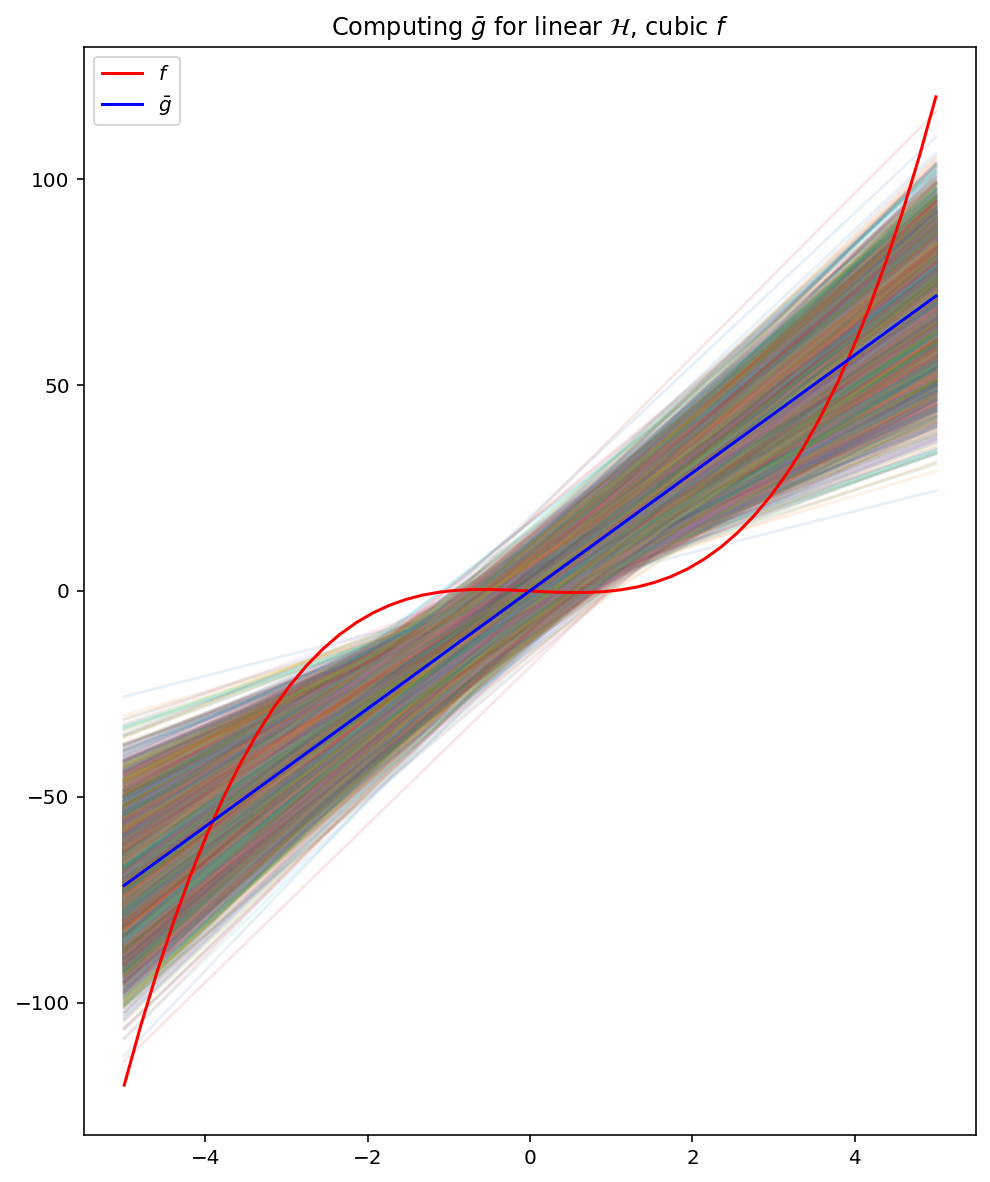

In [60]:
K,N= 10000,20

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

domain = np.linspace(-5,5)
codomain = (domain)**3-domain
model = LinearRegression()

plt.figure(figsize=(8,10))
G = gbar(K,N,model,domain.reshape(-1,1),codomain)
for gg in G:
    plt.plot(domain,gg,alpha=0.1)
plt.plot(domain,codomain,c='r',label=r'$f$')
plt.plot(domain,np.mean(G,axis=0),c='b',label=r'$\bar{g}$')
plt.legend()
plt.title(r"Computing $\bar{g}$ for linear $\mathcal{H}$, cubic $f$")
plt.show()


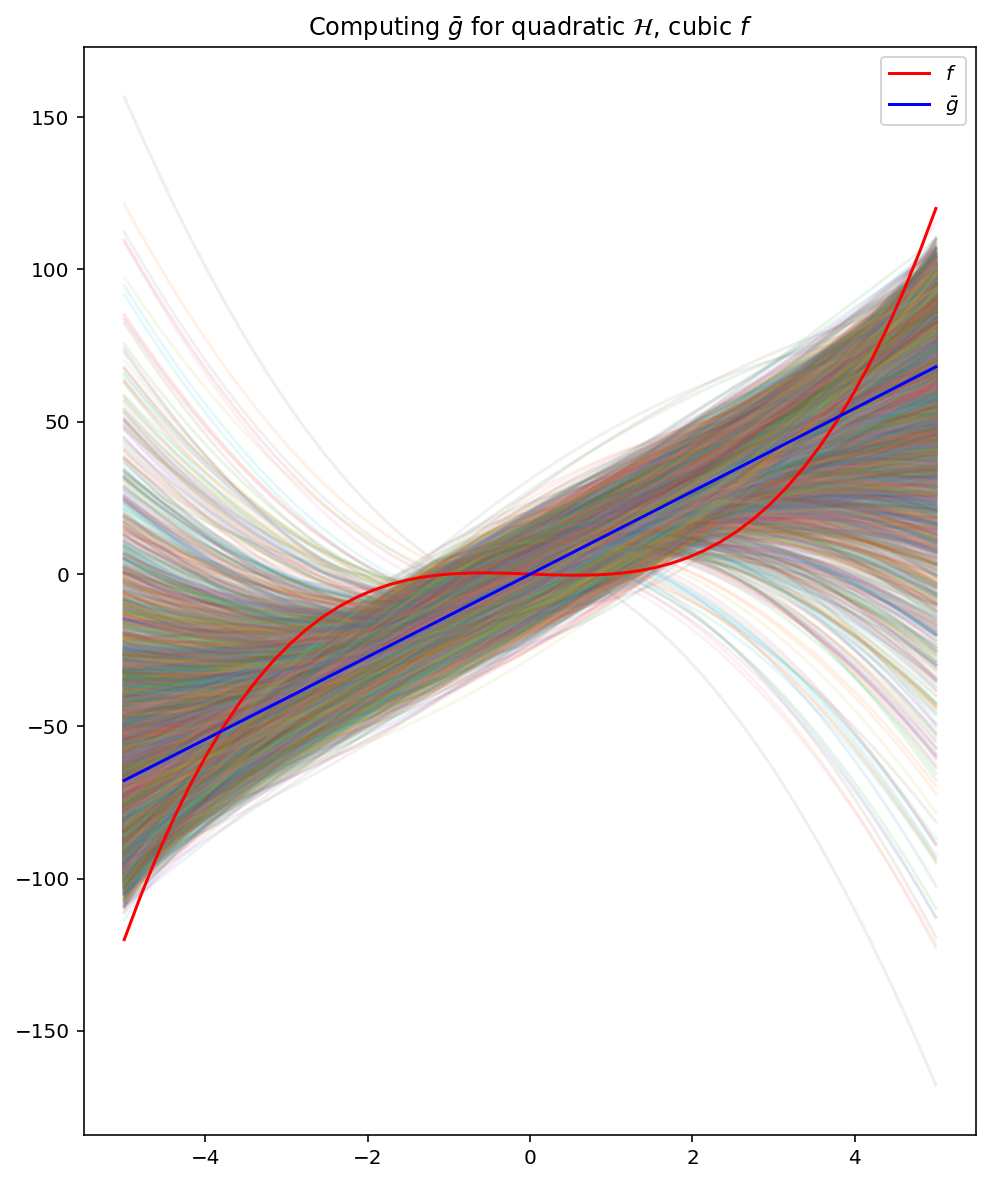

In [61]:
quaddom = np.c_[domain,domain**2]
codomain = (domain)**3-domain
model = LinearRegression()

plt.figure(figsize=(8,10))
Gq = gbar(K,N,model,quaddom,codomain)
for gg in Gq:
    plt.plot(domain,gg,alpha=0.1)
plt.plot(domain,codomain,c='r',label=r'$f$')
plt.plot(domain,np.mean(Gq,axis=0),c='b',label=r'$\bar{g}$')
plt.legend()
plt.title(r"Computing $\bar{g}$ for quadratic $\mathcal{H}$, cubic $f$")
plt.show()

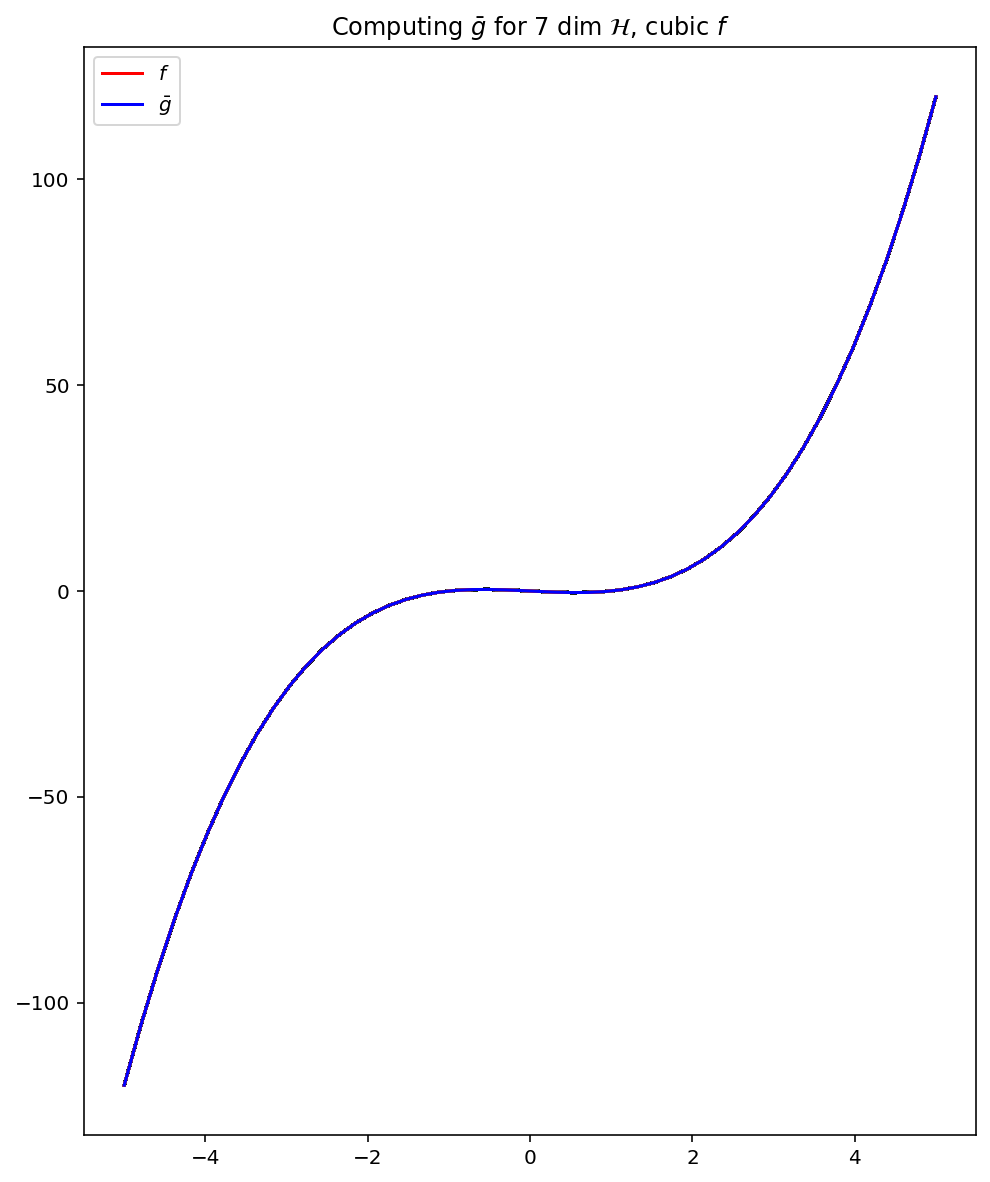

In [62]:
from sklearn.preprocessing import PolynomialFeatures
deg = 7
poly = PolynomialFeatures(deg)
polydom = poly.fit_transform(domain.reshape(-1,1))

codomain = (domain)**3-domain
model = LinearRegression()

plt.figure(figsize=(8,10))
Gn = gbar(K,N,model,polydom,codomain)
for gg in Gn:
    plt.plot(domain,gg,alpha=0.1)
plt.plot(domain,codomain,c='r',label=r'$f$')
plt.plot(domain,np.mean(Gn,axis=0),c='b',label=r'$\bar{g}$')
plt.legend()
plt.title(r"Computing $\bar{g}$ for "+str(deg)+r" dim $\mathcal{H}$, cubic $f$")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

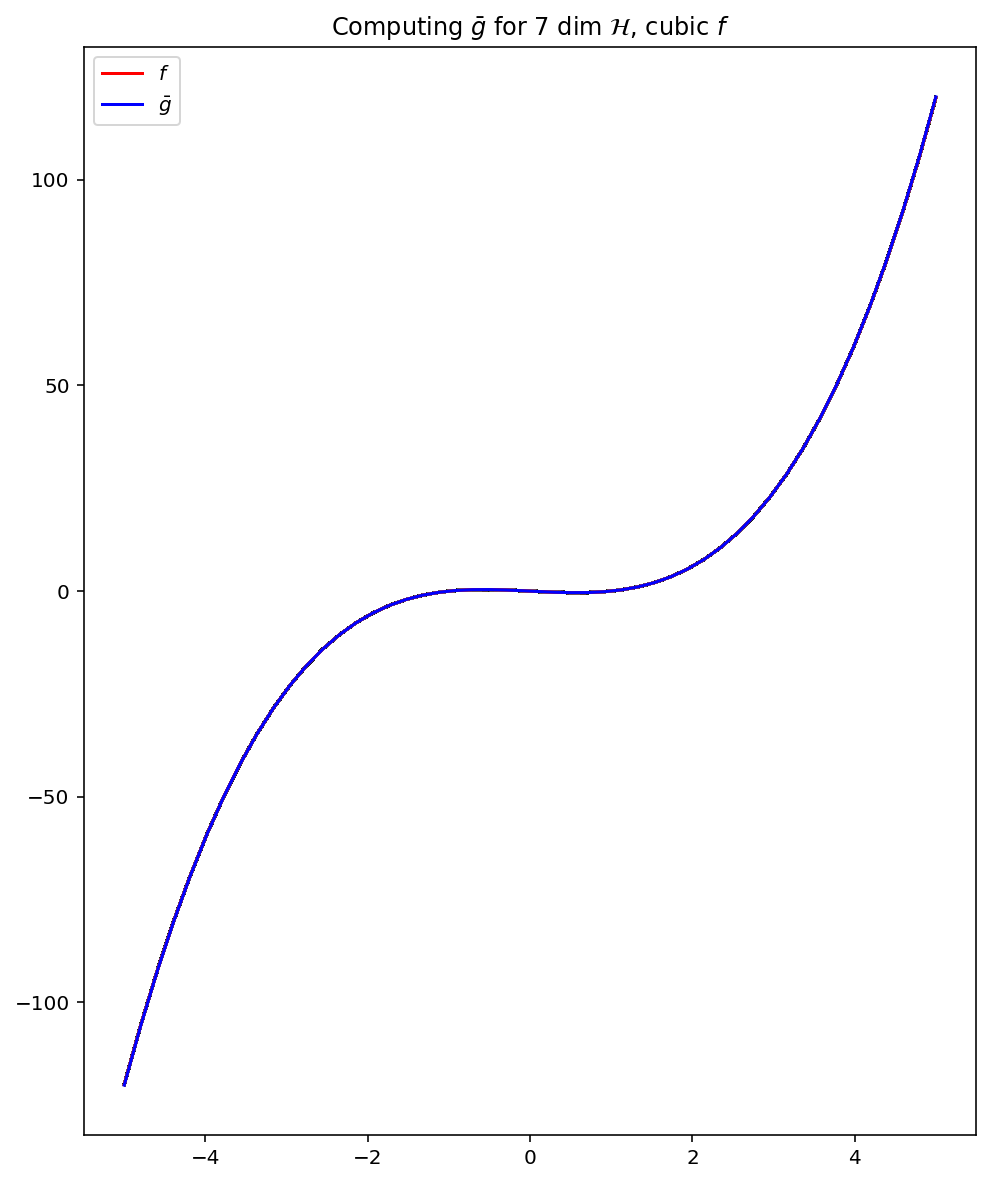

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingRegressor

deg = 7
poly = PolynomialFeatures(deg)
polydom = poly.fit_transform(domain.reshape(-1,1))

codomain = (domain)**3-domain
model = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10, random_state=0)
plt.figure(figsize=(8,10))
Gb = gbar(K,N,model,polydom,codomain)
for gg in Gn:
    plt.plot(domain,gg,alpha=0.1)
plt.plot(domain,codomain,c='r',label=r'$f$')
plt.plot(domain,np.mean(Gb,axis=0),c='b',label=r'$\bar{g}$')
plt.legend()
plt.title(r"Computing $\bar{g}$ for "+str(deg)+r" dim $\mathcal{H}$, cubic $f$")
plt.show

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

me = [mse(Gn[i],codomain) for i in range(K)]
np.mean(me)

9.854818435862746e-22

In [65]:
##Bias/variance breakdown of degree 1 model
b,v = bias(G,codomain),variance(G)
b,v,b+v

(401.6650832860537, 56.09108874060438, 457.7561720266581)

In [66]:
##Bias/variance breakdown of high degree model
b,v = bias(Gn,codomain),variance(Gn)
b,v,b+v

(2.8607688463362475e-23, 1.0129560565713749e-21, 1.0415637450347373e-21)

In [67]:
##Bias/variance breakdown of high degree model
b,v = bias(Gb,codomain),variance(Gb)
b,v,b+v

(0.002886373111440628, 11.90028352656075, 11.903169899672191)

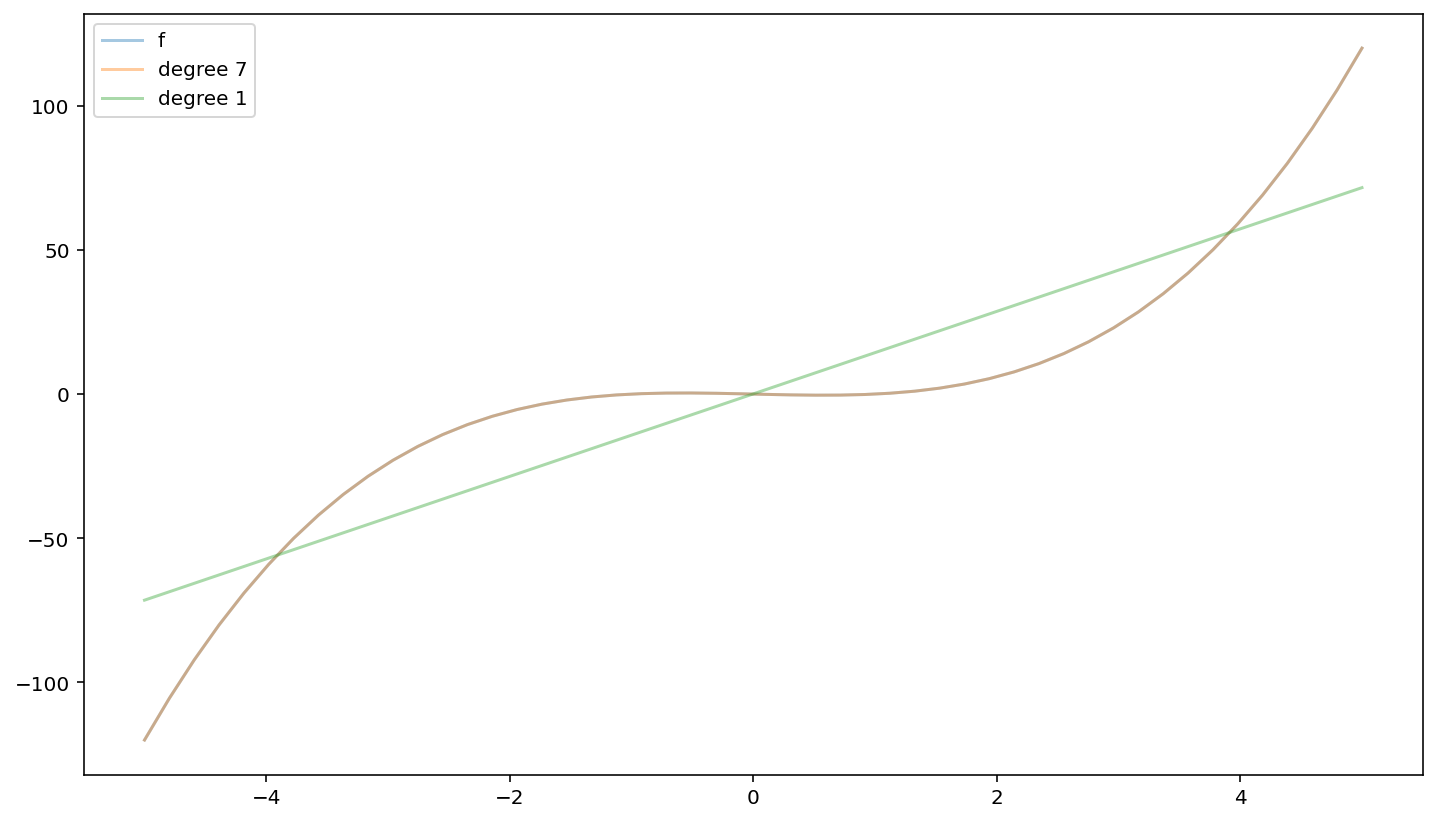

The average degree 7 model and f are indistinguishable


In [68]:
plt.plot(domain,codomain,label="f",alpha=0.4)

plt.plot(domain,np.mean(Gn,axis=0),label="degree {}".format(deg),alpha=0.4)
plt.plot(domain,np.mean(G,axis=0),label="degree {}".format(1),alpha=0.4)
plt.legend()
plt.show()
print("The average degree 7 model and f are indistinguishable")

In [69]:
mse(np.mean(Gn,axis=0),codomain)

2.8607688463362475e-23

![img](biasvariance2.png)

![img](derivation.jpg)

#hi
<img src="derivation.jpg" alt="Flowers in Chania",width=300>
